In [ ]:
import findspark
findspark.init('C:\spark\spark-3.0.1-bin-hadoop3.2')
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [ ]:
sc = SparkContext()
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [ ]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)
lines = socket_stream.window( 10 )

In [ ]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple('tweets', fields )

In [ ]:

( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

In [ ]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

%matplotlib inline

In [ ]:
ssc.start()

c:\users\ak das\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ak das\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ak das\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ak das\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ak das\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2366 missing from current font.
  

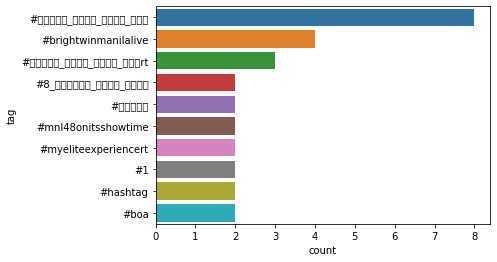

In [ ]:
count = 0
while count < 10:
  time.sleep( 3 )
  top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
  top_10_df = top_10_tweets.toPandas()
  display.clear_output(wait=True)
  #plt.figure( figsize = ( 10, 8 ) )
  sns.barplot( x="count", y="tag", data=top_10_df)
  plt.show()
  count = count + 1